# Using feature selection 

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [40]:
df = pd.read_csv("c:/users/HP/Dropbox/Breast Cancer ML Project/breast-cancer-wisconsin-data/data.csv")
cancer_df = df.copy()    # CREATING A COPY OF THE ORIGINAL DATAFRAME
print("Shape of the data : " , cancer_df.shape )


Shape of the data :  (569, 33)


# Preprocessing 

In [41]:
y = cancer_df.diagnosis.values 

cancer_df.drop(["Unnamed: 32" , "id", "diagnosis"] , axis = 1 , inplace= True ) 
cancer_df.head(3) 
X = cancer_df.values 

In [42]:
from sklearn.preprocessing import StandardScaler 

In [43]:
# we need to have unit mean and zero variance/ step deviation 

scaler = StandardScaler()
scaler.fit(X )
scaled_x = scaler.transform(X) 
# scaled_X is the new X  

<p style = "color :red ; font-family : monospace ; font-size :25px " > feature selection </p>

# Univariate Elimination

In [44]:
from sklearn.feature_selection import SelectKBest , f_classif
test = SelectKBest(score_func= f_classif , k= 25    )
fit = test.fit(scaled_x , y ) 
new_x = fit.transform(scaled_x )


In [45]:
from sklearn.model_selection import KFold 

# Logistic Regression 

In [46]:
accuracy = [] 

In [47]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver = "liblinear")

In [48]:
kfold = KFold(n_splits= 10 , shuffle=True , random_state= 4  ) 
score = []
for train , test  in kfold.split(new_x , y ) :
    log_model.fit(new_x[train ] , y[train ])
    score.append(log_model.score(new_x[test] , y[test])) 
    
print(score)    
    

[0.9473684210526315, 0.9824561403508771, 1.0, 0.9473684210526315, 1.0, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9642857142857143]


In [49]:
score = round(sum(score)*10 , 2 ) 
accuracy.append(score )
print(score)

97.71


<p style="color : green ; font-size :20px ; font-family : verdana; "> Logistic Regression gives an accuracy of 
<b>97.71 </b> </p>

In [50]:
from sklearn.tree import DecisionTreeClassifier 

In [51]:

for depth in range(3, 8 ) :
    tree_accuracy = []
    for train , test in kfold.split(new_x ) :
        X_train , X_test = new_x[train ] , new_x[test]
        y_train , y_test = y[train ] , y[test ]
        tree = DecisionTreeClassifier(criterion= "entropy" , max_depth = depth , random_state= 4  )
        tree.fit(X_train ,y_train )
        tree_accuracy.append(tree.score(X_test , y_test ))
    
    print("Depth : " , depth )
    print(round(sum(tree_accuracy)*10, 2 ) , end = "\n\n") 


Depth :  3
92.98

Depth :  4
92.44

Depth :  5
93.5

Depth :  6
92.8

Depth :  7
92.63



<p style = "color : green ; font-size :20px ; fontfamily : verdana " >for depth = 5 , we are getting a max accuracy of <b>93.5</b> </p>

In [52]:
accuracy.append(93.5) 

In [53]:
from sklearn.neighbors import KNeighborsClassifier 

In [54]:
for k in range(2, 15 ) :
    k_accuracy = [] 
    for train , test in kfold.split(new_x ) : 
        X_train , X_test = new_x[train ] , new_x[test]
        y_train , y_test = y[train ] , y[test ]
        knn_model = KNeighborsClassifier(n_neighbors= k ) 
        knn_model.fit(X_train , y_train) 
        k_accuracy.append(knn_model.score(X_test , y_test )) 
        
    print("K value " , k ) 
    print("Accuracy : " , round(sum(k_accuracy ) * 10 , 2 ) , end = "\n\n")

K value  2
Accuracy :  95.96

K value  3
Accuracy :  96.84

K value  4
Accuracy :  97.19

K value  5
Accuracy :  96.84

K value  6
Accuracy :  97.19

K value  7
Accuracy :  97.01

K value  8
Accuracy :  95.78

K value  9
Accuracy :  96.31

K value  10
Accuracy :  96.13

K value  11
Accuracy :  96.31

K value  12
Accuracy :  95.78

K value  13
Accuracy :  95.96

K value  14
Accuracy :  95.96



In [55]:
accuracy.append(97.19)

<p style = "color : green ; font-size :20px ; fontfamily : verdana " >for k = 6 , we are getting a max accuracy of <b>97.19</b> </p>

# visualization 

In [56]:
test = ["log_reg" , "Dec_tree" , "KNN"]
cv_accuracy = [97.36 , 93.32 , 97.01 ]

In [57]:
test_df = pd.DataFrame({"Test" : test , "Using Feature selection" : accuracy , "No feature selection" : cv_accuracy})
test_df

,Test,Using Feature selection,No feature selection
0,log_reg,97.71,97.36
1,Dec_tree,93.50,93.32
2,KNN,97.19,97.01


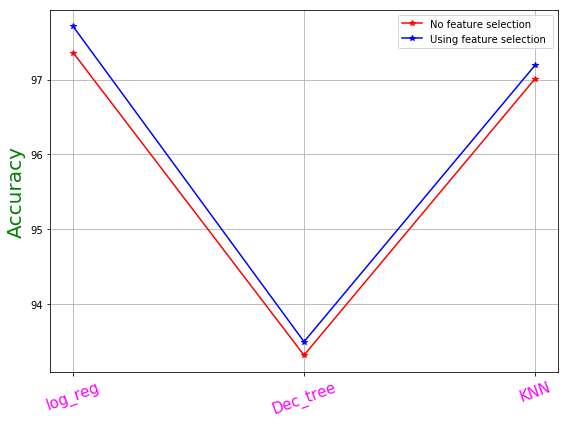

In [58]:
plt.figure(figsize = (8, 6))
plt.plot(test, cv_accuracy , color = "red" , marker = "*" , label = "No feature selection")
plt.plot(test , accuracy , color = "blue" , marker = "*" , label = "Using feature selection ")
plt.ylabel("Accuracy" , color = "green" ,  fontsize = 20)
plt.xticks(color = "magenta" , fontsize = 15 , rotation = 20 )
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("third_ana1.png")
plt.show()

# SVM classifier 

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

In [60]:
kernels = ["linear" , "poly", "rbf" , "sigmoid"] 
C = [1 , 10 ,100 , 1000 ]
gamma = [1 , 0.1 , 0.01 , 0.001 ]
kernel_accuracy = [] 

In [61]:
for kernel in kernels :
    fold_accuracy = []
    for train ,test in kfold.split(new_x , y ) :
        X_train , X_test = new_x[train ] , new_x[test]
        y_train , y_test = y[train] , y[test] 
        grid = GridSearchCV(estimator= SVC() , param_grid= {"C":C , "gamma" : gamma , "kernel" : [kernel]} ) 
        grid.fit(X_train , y_train )
        fold_accuracy.append(grid.score(X_test, y_test ))
    
    print("Kernel name : " , kernel )
    score = round(sum(fold_accuracy ) * 10 , 2 )
    print("Accuracy : " , score )
    kernel_accuracy.append(score)


D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. Th

Kernel name :  linear
Accuracy :  96.83


D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. Th

Kernel name :  poly
Accuracy :  96.31


D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. Th

Kernel name :  rbf
Accuracy :  98.06


D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying

Kernel name :  sigmoid
Accuracy :  97.54


In [62]:
cv_kernel_accuracy = [96.66, 96.31, 97.89, 96.48]
kernel_accuracy

[96.83, 96.31, 98.06, 97.54]

# visualization

In [63]:
kernel_df = pd.DataFrame({"Kernels" : kernels ,"Using Feature Selection " : kernel_accuracy , "No Feature selection" : cv_kernel_accuracy })
kernel_df 

,Kernels,Using Feature Selection,No Feature selection
0,linear,96.83,96.66
1,poly,96.31,96.31
2,rbf,98.06,97.89
3,sigmoid,97.54,96.48


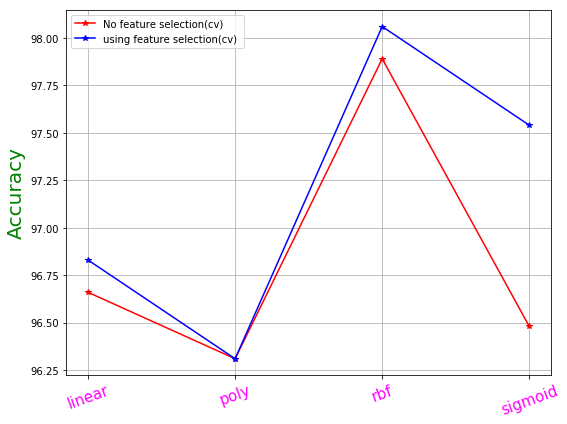

In [64]:
plt.figure(figsize = (8 , 6 ))
plt.plot(kernels , cv_kernel_accuracy , color = "red" , marker = "*" , label = "No feature selection(cv)")
plt.plot(kernels , kernel_accuracy , color = "blue" , marker = "*" , label = "using feature selection(cv) ")
plt.legend() 
plt.grid(True)
plt.ylabel("Accuracy" , color = "green" ,  fontsize = 20)
plt.xticks(color = "magenta" , fontsize = 15 , rotation = 20 )
plt.tight_layout()
plt.savefig("third_ana2.png")
plt.show()